# Projeto 1: Classificação de Dígitos com Redes Neurais Artificiais (RNA) no MNIST

Aluno: André Wanderley de Melo

Proposta: Comparar arquiteturas com 1, 2 e 3 camadas ocultas. Treinar com ruído gaussiano e analisar como a profundidade da rede afeta o desempenho.

In [ ]:
# 0. Importação das Bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd


PARÂMETROS UTILIZADOS:

épocas = 50;

camadas_ocultas = 1, 5 e 10;

ruido_gauss = 0.1;

batch_size = 128;

learning_rate = 0.001

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8099 - loss: 0.6746 - val_accuracy: 0.9557 - val_loss: 0.1705
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9466 - loss: 0.1862 - val_accuracy: 0.9643 - val_loss: 0.1264
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9633 - loss: 0.1301 - val_accuracy: 0.9700 - val_loss: 0.1064
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9712 - loss: 0.0988 - val_accuracy: 0.9723 - val_loss: 0.0971
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9768 - loss: 0.0805 - val_accuracy: 0.9762 - val_loss: 0.0859
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9820 - loss: 0.0649 - val_accuracy: 0.9768 - val_loss: 0.0800
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9847 - loss: 0.0529 - val_accuracy: 0.9785 - val_loss: 0.0785
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step -

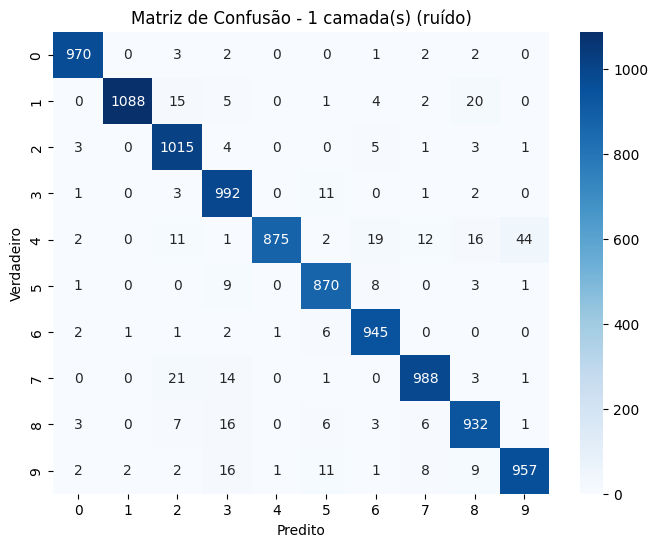

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


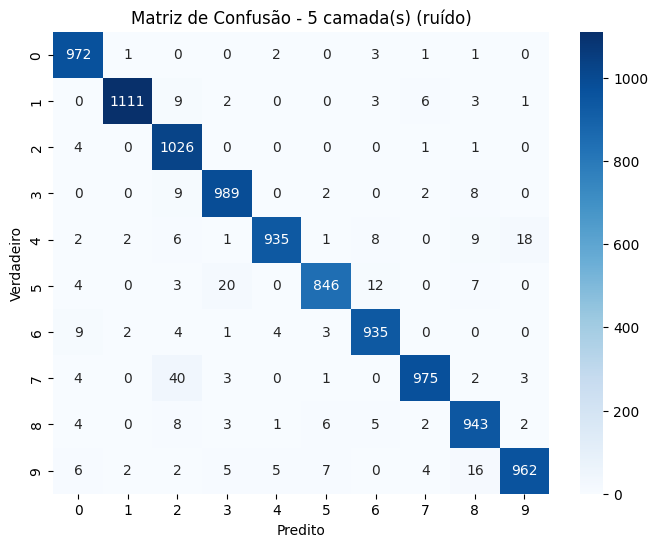

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


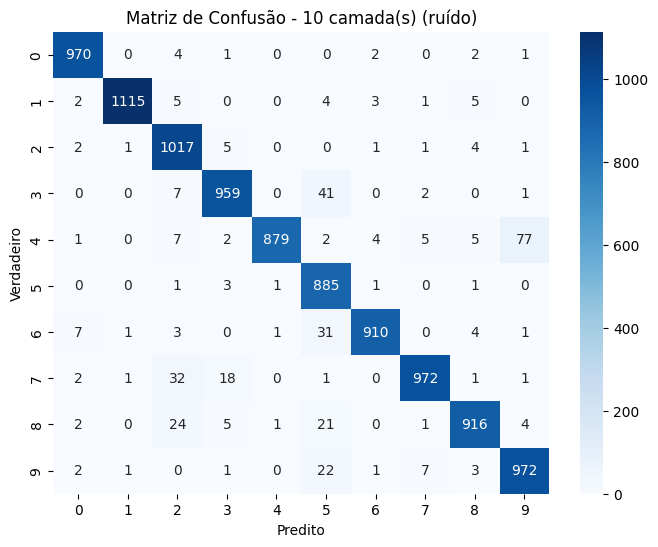

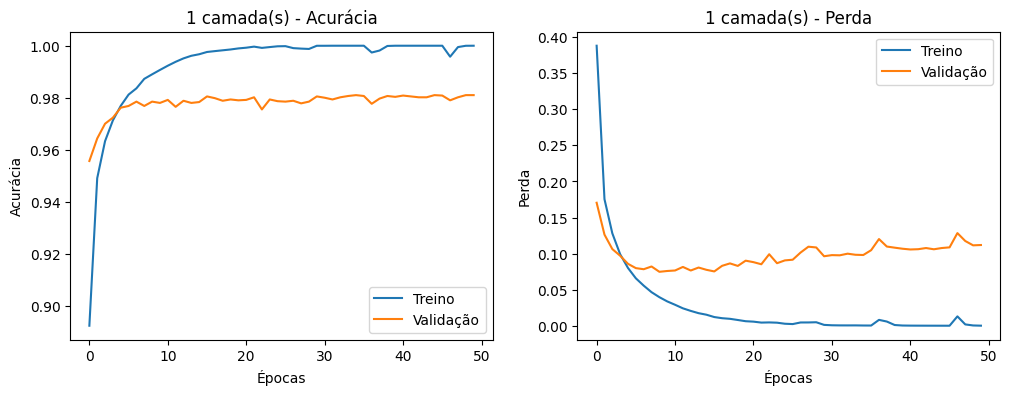

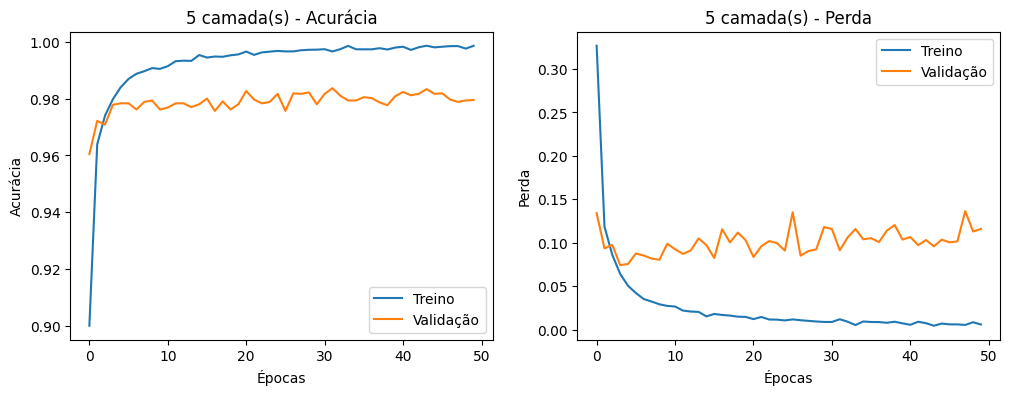

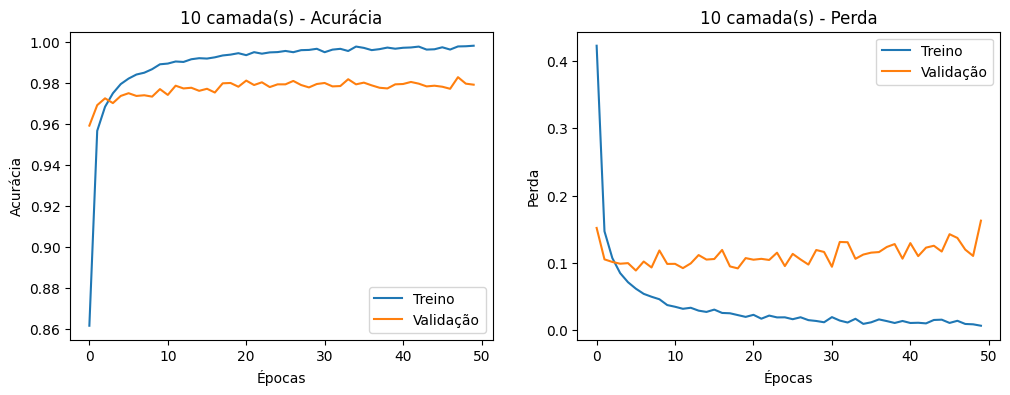

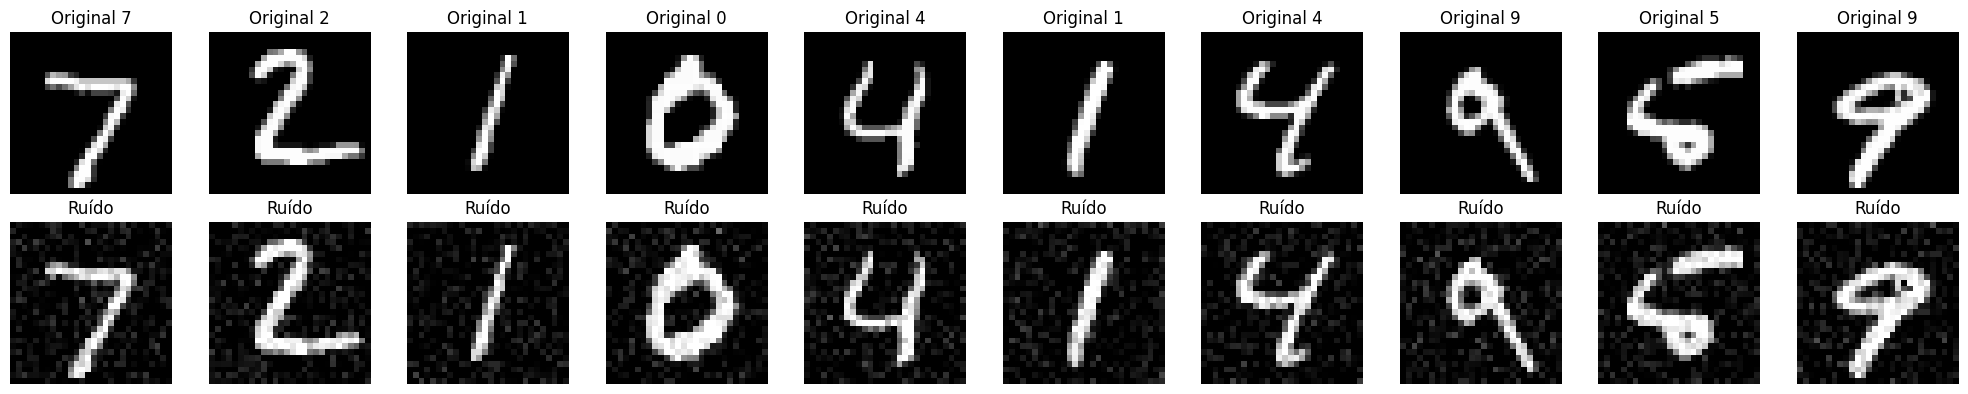

In [ ]:
# 1. Carregamento e normalização do dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Conversão para vetores
x_train = x_train.reshape(x_train.shape[0], -1)  # shape (60000, 784)
x_test = x_test.reshape(x_test.shape[0], -1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# 2. Função para criar MLPs com n camadas ocultas
def criar_modelo_mlp(num_camadas_ocultas, learning_rate=0.001, num_neuronios=128):
    modelo = keras.Sequential()
    modelo.add(keras.Input(shape=(784,)))
    for _ in range(num_camadas_ocultas):
        modelo.add(Dense(num_neuronios, activation='relu'))
    modelo.add(Dense(10, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return modelo

# 3. Treinamento com dados limpos
modelos = {}
historicos = {}
epochs = 50
batch_size = 128

for n_camadas in [1, 5, 10]:
    modelo = criar_modelo_mlp(n_camadas, learning_rate=0.001)
    historico = modelo.fit(
        x_train, y_train,
        validation_split=0.1,
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )
    modelos[n_camadas] = modelo
    historicos[n_camadas] = historico

# 4. Adição de ruído gaussiano (após treinamento)
def adicionar_ruido_gaussiano(data, mean=0.0, std=0.1):
    noise = np.random.normal(mean, std, data.shape)
    noisy_data = np.clip(data + noise, 0.0, 1.0)
    return noisy_data

x_test_ruidoso = adicionar_ruido_gaussiano(x_test)

# 5. Avaliação com dados ruidosos
print("\n--- Avaliação com Dados Ruidosos ---")
for n_camadas, modelo in modelos.items():
    loss, acc = modelo.evaluate(x_test_ruidoso, y_test, verbose=0)
    print(f"Modelo com {n_camadas} camada(s): Loss = {loss:.4f}, Acurácia = {acc:.4f}")

# 6. Matrizes de confusão

def plotar_matriz_confusao(modelo, x_teste, y_teste, titulo):
    y_pred = np.argmax(modelo.predict(x_teste), axis=1)
    y_true = np.argmax(y_teste, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.title(titulo)
    plt.show()

for n_camadas, modelo in modelos.items():
    plotar_matriz_confusao(modelo, x_test_ruidoso, y_test, f"Matriz de Confusão - {n_camadas} camada(s) (ruído)")

# 7. Curvas de aprendizado

def plotar_historico(historico, titulo):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(historico.history['accuracy'], label='Treino')
    plt.plot(historico.history['val_accuracy'], label='Validação')
    plt.title(f"{titulo} - Acurácia")
    plt.xlabel("Épocas")
    plt.ylabel("Acurácia")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(historico.history['loss'], label='Treino')
    plt.plot(historico.history['val_loss'], label='Validação')
    plt.title(f"{titulo} - Perda")
    plt.xlabel("Épocas")
    plt.ylabel("Perda")
    plt.legend()
    plt.show()

for n_camadas, historico in historicos.items():
    plotar_historico(historico, f"{n_camadas} camada(s)")

# 8. Imagens representativas: original vs ruidoso
plt.figure(figsize=(20, 4))
for i in range(10):
    # Original
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Original {np.argmax(y_test[i])}")
    plt.axis('off')
    # Ruidoso
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_ruidoso[i].reshape(28, 28), cmap='gray')
    plt.title("Ruído")
    plt.axis('off')
plt.tight_layout()
plt.show()



Modelo com 1 camada(s):
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


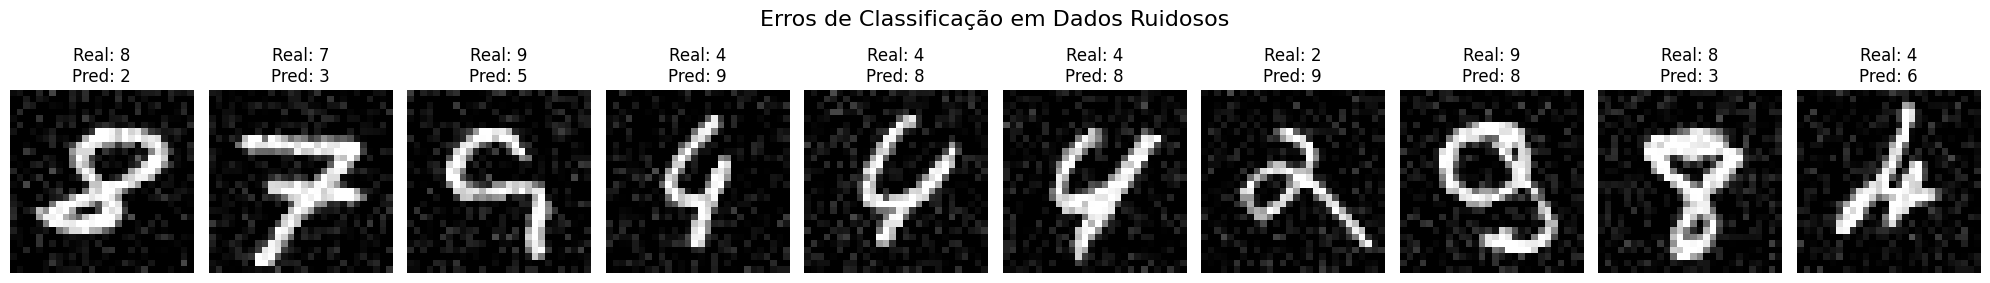


Modelo com 5 camada(s):
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


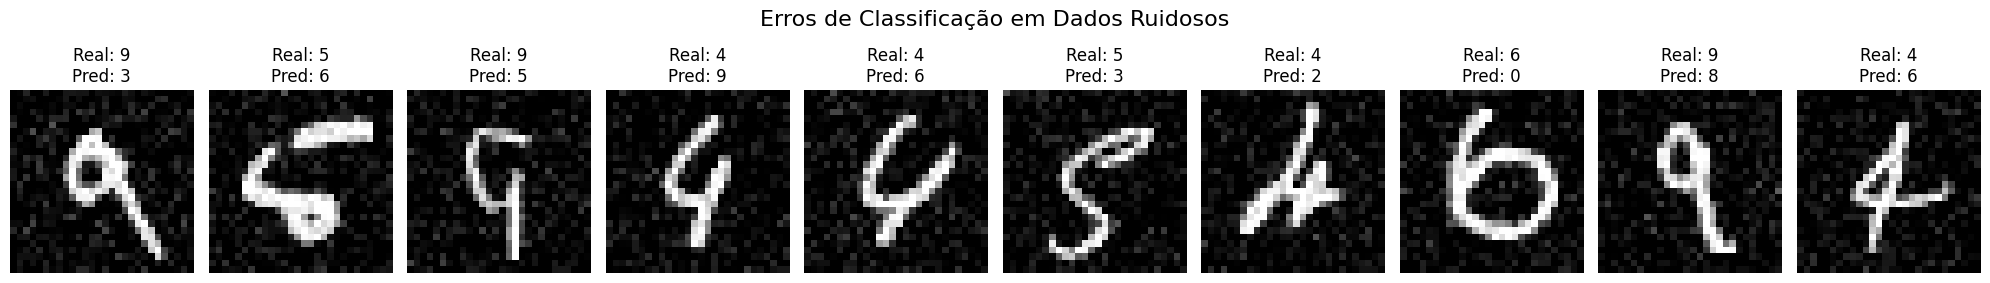


Modelo com 10 camada(s):
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


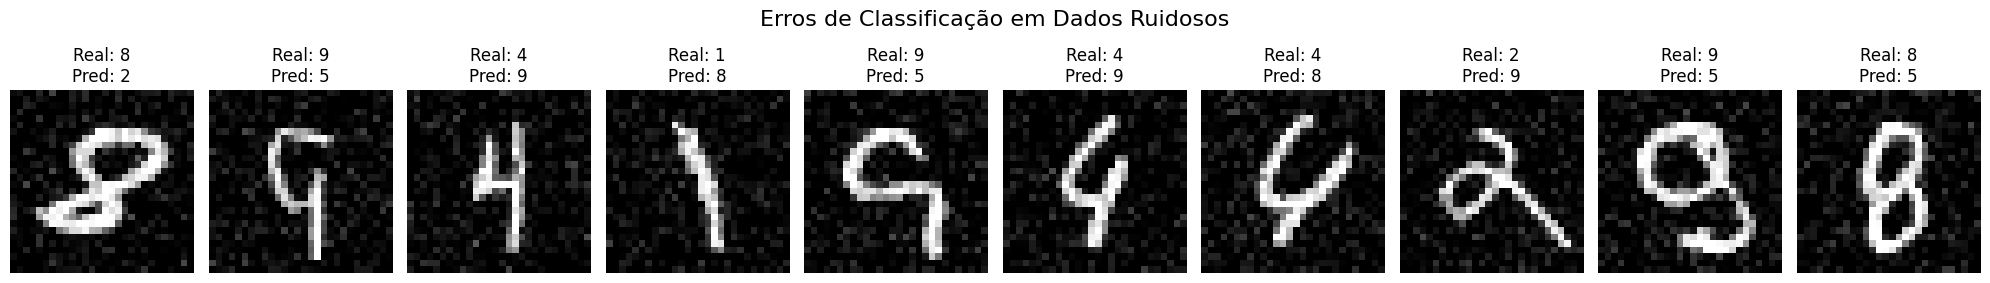

In [6]:
# 9. Função ajustada para mostrar erros de classificação em dados ruidosos
def mostrar_erros_de_classificacao(modelo, x_ruido, y_true, qtd_erros=10):
    """
    Exibe as primeiras `qtd_erros` imagens ruidosas que o modelo classificou incorretamente.

    Args:
        modelo: modelo Keras treinado.
        x_ruido: array de entradas com ruído (shape: [n_amostras, 784]).
        y_true: rótulos verdadeiros em one-hot (shape: [n_amostras, num_classes]).
        qtd_erros: número de erros a exibir.
    """
    # Predição e verdadeiros
    y_pred = np.argmax(modelo.predict(x_ruido), axis=1)
    y_true_idx = np.argmax(y_true, axis=1)

    # Índices onde ocorreu erro
    erros = np.where(y_pred != y_true_idx)[0]
    if len(erros) == 0:
        print("Nenhum erro encontrado!")
        return

    # Número real de erros a exibir
    n = min(qtd_erros, len(erros))
    plt.figure(figsize=(2 * n, 3))
    plt.suptitle("Erros de Classificação em Dados Ruidosos", fontsize=16)

    for i in range(n):
        idx = erros[i]
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(x_ruido[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Real: {y_true_idx[idx]}\nPred: {y_pred[idx]}")
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.9])
    plt.show()


for n_camadas, modelo in modelos.items():
    print(f"\nModelo com {n_camadas} camada(s):")
    mostrar_erros_de_classificacao(modelo, x_test_ruidoso, y_test, qtd_erros=10)




📊 Tabela de Comparação de Acurácias (em %)
 Camadas Ocultas  Acurácia (Limpo)  Acurácia (Ruído)
               1         98.070002         96.319997
               5         97.899997         96.939999
              10         97.750002         95.950001


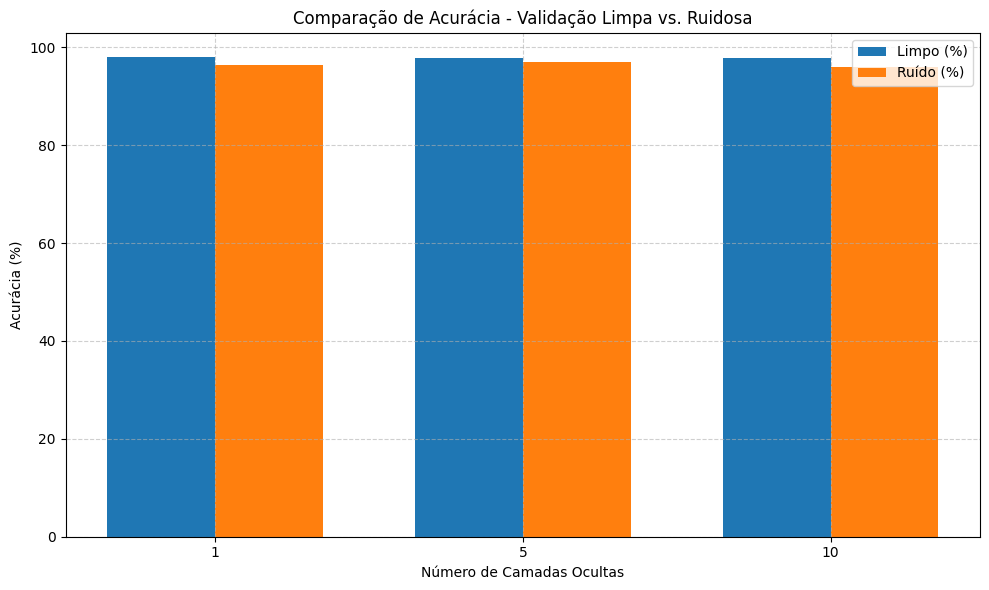

In [ ]:
# 11. Comparação: Validação com dados limpos vs. ruidosos
resultados = {
    'Camadas Ocultas': [],
    'Acurácia (Limpo)': [],
    'Acurácia (Ruído)': []
}

for n_camadas, modelo in modelos.items():
    _, acc_limpo = modelo.evaluate(x_test, y_test, verbose=0)
    _, acc_ruido = modelo.evaluate(x_test_ruidoso, y_test, verbose=0)

    resultados['Camadas Ocultas'].append(n_camadas)
    resultados['Acurácia (Limpo)'].append(acc_limpo * 100)
    resultados['Acurácia (Ruído)'].append(acc_ruido * 100)

# Criando DataFrame
df_resultados = pd.DataFrame(resultados)
print("\n📊 Tabela de Comparação de Acurácias (em %)")
print(df_resultados.to_string(index=False))

# Gráfico de barras comparando as acurácias
plt.figure(figsize=(10, 6))
largura = 0.35
x = np.arange(len(df_resultados['Camadas Ocultas']))

plt.bar(x - largura/2, df_resultados['Acurácia (Limpo)'], width=largura, label='Limpo (%)')
plt.bar(x + largura/2, df_resultados['Acurácia (Ruído)'], width=largura, label='Ruído (%)')

plt.xticks(x, df_resultados['Camadas Ocultas'])
plt.xlabel('Número de Camadas Ocultas')
plt.ylabel('Acurácia (%)')
plt.title('Comparação de Acurácia - Validação Limpa vs. Ruidosa')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


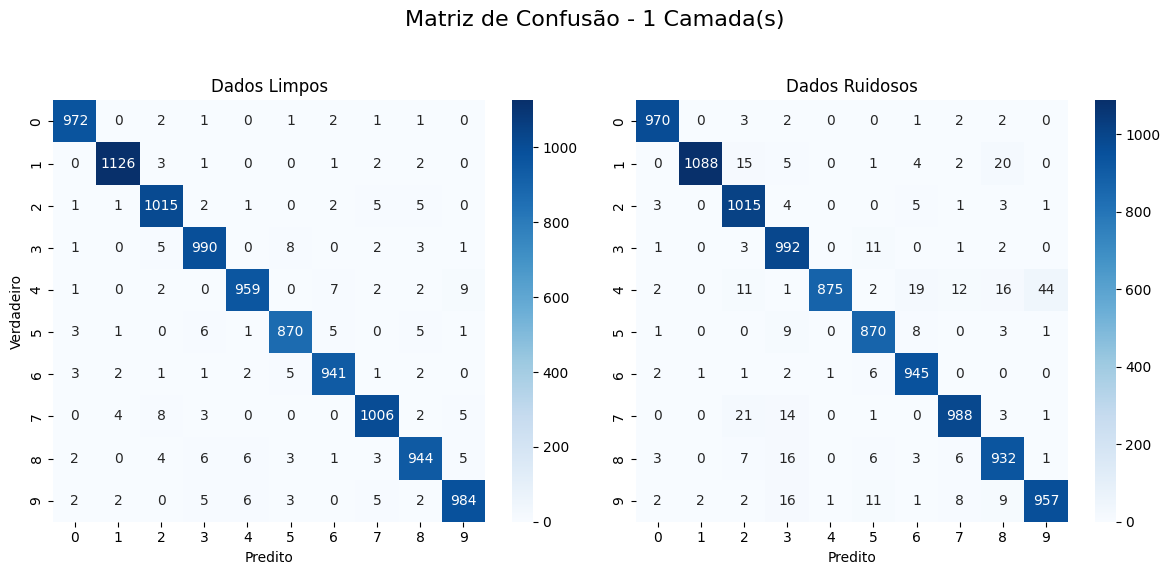

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


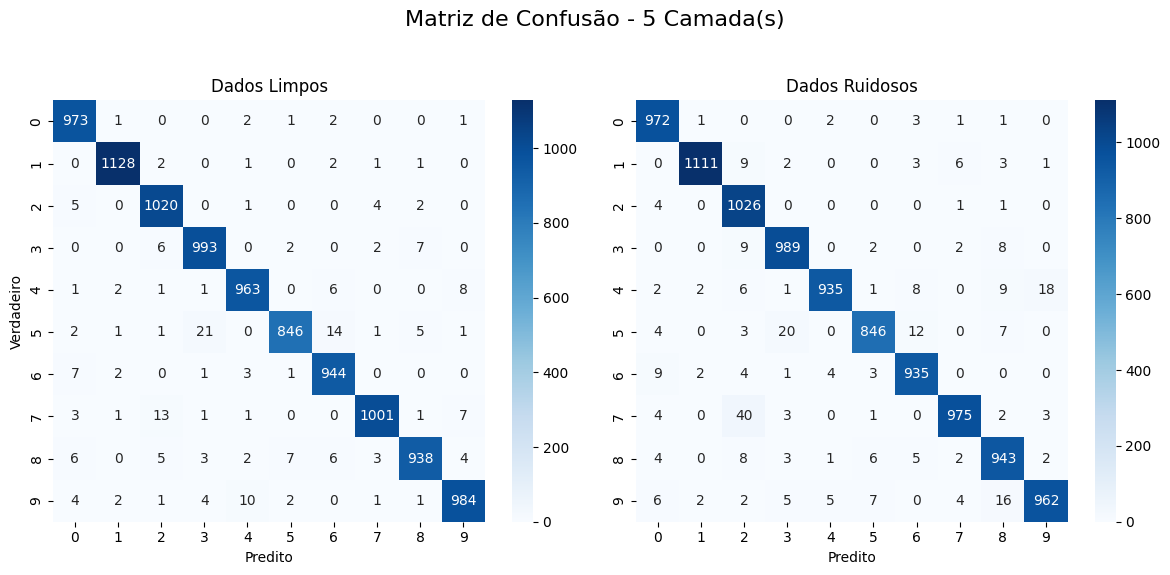

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


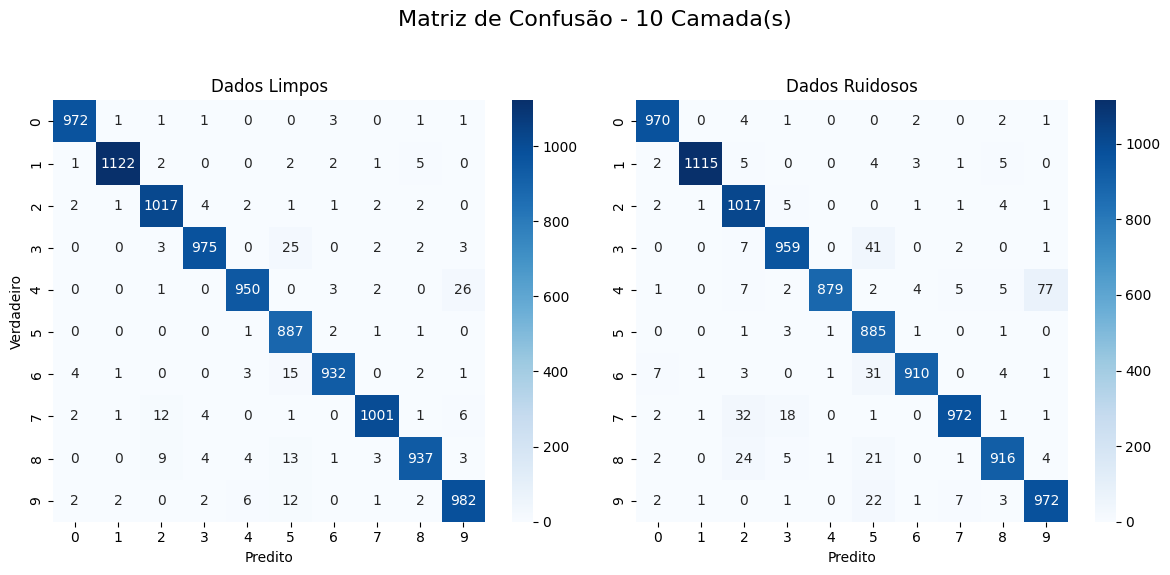

In [10]:
def plot_conf_matrices_comparativas(modelos_dict, x_clean, x_noisy, y_true, figsize=(12, 6)):
    '''
    Para cada modelo em modelos_dict, plota lado a lado a matriz de confusão
    em dados limpos (esquerda) e dados ruidosos (direita).
    '''
    for n_camadas, modelo in modelos_dict.items():
        # Previsões
        y_pred_clean = np.argmax(modelo.predict(x_clean), axis=1)
        y_pred_noisy = np.argmax(modelo.predict(x_noisy), axis=1)
        y_true_idx = np.argmax(y_true, axis=1)

        # Matrizes
        cm_clean = confusion_matrix(y_true_idx, y_pred_clean)
        cm_noisy = confusion_matrix(y_true_idx, y_pred_noisy)

        # Plot
        fig, axes = plt.subplots(1, 2, figsize=figsize)
        fig.suptitle(f'Matriz de Confusão - {n_camadas} Camada(s)', fontsize=16)

        sns.heatmap(cm_clean, annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title('Dados Limpos')
        axes[0].set_xlabel('Predito')
        axes[0].set_ylabel('Verdadeiro')

        sns.heatmap(cm_noisy, annot=True, fmt='d', cmap='Blues', ax=axes[1])
        axes[1].set_title('Dados Ruidosos')
        axes[1].set_xlabel('Predito')
        axes[1].set_ylabel('')  # evita label duplicado

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# Chamada da função para plotar todas as matrizes comparativas
plot_conf_matrices_comparativas(modelos, x_test, x_test_ruidoso, y_test)